## Analyze A/B Test Results

Este projeto irá garantir que você tenha dominado os assuntos abordados nas aulas de estatística. A esperança é que este projeto seja o mais abrangente possível sobre esses tópicos.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

Os testes A / B são comumente realizados por analistas de dados e cientistas de dados. 

Neste projeto, está trabalhado para entender os resultados de um teste A / B executado por um site de comércio eletrônico. Seu objetivo é ajudar a empresa a entender se eles devem implementar a nova página, manter a página antiga ou talvez executar o experimento por mais tempo para tomar sua decisão.

Avaliaremos se rejeitamos ou não a hipotese nula.



<a id='probability'></a>
#### Part I - Probability

Para começar, vamos importar nossas bibliotecas.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#Lendo o arquivo.
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
#Verificando o número de linhas e colunas.
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
# Retornando a contagem de User_id únicos
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
#Retornando a média de conversão
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
#contando linhas em que o tratamento e a nova página não correspondem
df.query('group=="treatment" and landing_page != "new_page" or group=="control" and landing_page=="new_page"').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [8]:
#Contagem de valores nulos
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#Verificando se as linhas corretas foram removidas.
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

In [10]:
#Busca todos os índices em que o tratamento e a nova página não correspondem.
indices=df.query('group=="treatment" and landing_page!="new_page" or group=="control" and landing_page!="old_page"').index.values
indices

array([    22,    240,    308, ..., 294252, 294253, 294331], dtype=int64)

In [11]:
df2=df.drop(indices)

In [12]:
#Verificando se as linhas corretas foram removidas.
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

In [14]:
df2.shape

(290585, 5)

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
#Identificando o conteúdo os registros duplicados.
df2[df2.duplicated(subset='user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
#Identificando o conteúdo os registros duplicados.
df2[df2.duplicated(subset="user_id", keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
#Removendo a linha duplicada de número 2893.
df2.drop(2893, inplace=True)
df2[df2.duplicated(subset="user_id", keep=False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
#Taxa de conversão Independente da pagina.
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
#Proporção de Conversão do Grupo de individuos que recebei a página Control.
ctr_convert=df2.query('group=="control"').converted.mean()
ctr_convert

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
#Conversão do grupo de individuos que recebeu a página tratament.
exp_convert=df2.query('group=="treatment"').converted.mean()
exp_convert

0.11880806551510564

In [21]:
d=exp_convert - ctr_convert
d

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [22]:
#Probabilidade de receber a new page individual.
pnew_page = (df2['landing_page'] == 'new_page').mean()
pnew_page

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Os resultados coletados até agora, não possuem resultados suficientes para o entendimento que a página de tratamento direcione para mais conversões. Partindo dos números acima, há uma sugestão de que as páginas de controle têm mais conversões.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<center>$H_{0}$: $p_{new}$ <= $p_{old}$ </center>
<center>$H_{1}$: $p_{new}$ > $p_{old}$</center>.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
#Igual a taxa de conversão geral.
pnew=df2.converted.mean()
pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
pold=df2.converted.mean()
pold

0.11959708724499628

c. What is $n_{new}$?

In [25]:
nnew = df2.query('landing_page == "new_page"').shape[0]
nnew

145310

d. What is $n_{old}$?

In [26]:
nold = df2.query('landing_page == "old_page"').shape[0]
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
p=[pnew for i in range(nnew)]
len(p)

145310

In [28]:
df2.converted.count()

290584

In [29]:
#Amostras de distribuição binominal de probabilidade pnew
newpage_converted= np.random.binomial(1, p=pnew, size=nnew) 
newpage_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
#Amostras de uma distribuição binominal de probabilidade pold
oldpage_converted= np.random.binomial(1, p=pold, size=nold)
oldpage_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
newpage_converted.mean()

0.11861537402794027

In [32]:
oldpage_converted.mean()

0.11863100072965568

In [33]:
dif=newpage_converted.mean()-oldpage_converted.mean()
dif

-1.5626701715412694e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [34]:
p_difs=[]
new_convert=np.random.binomial(nnew,pnew, 10000)/nnew
old_convert=np.random.binomial(nold, pold, 10000)/nold
p_difs=new_convert-old_convert

In [35]:
p_difs

array([-1.28231821e-03,  1.70494897e-03, -9.84100015e-05, ...,
        1.64318807e-03,  1.98017818e-03,  1.82839573e-03])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

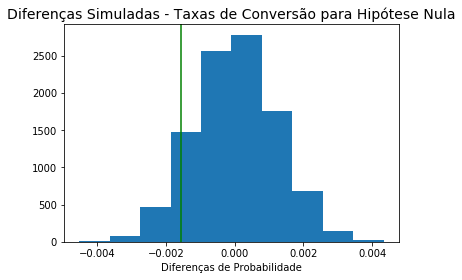

In [36]:
p_difs=np.array(p_difs)
plt.title('Diferenças Simuladas - Taxas de Conversão para Hipótese Nula', fontsize = 14)
plt.xlabel('Diferenças de Probabilidade')
plt.hist(p_difs)
plt.axvline(d, color='green')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
(d < p_difs).mean()

0.91

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Conforme o valor P, a nova página não possui taxas de conversão melhores que a página antiga. O valor 0,9 é muito maior que alfa (0,05).**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" and converted==1').count()[0]
convert_new = df2.query('landing_page=="new_page" and converted==1').count()[0]
n_old = df2.query('landing_page=="old_page"').count()[0]
n_new = df2.query('landing_page=="new_page"').count()[0]
print('Número de conversão da página antiga: ',convert_old)
print('Número de pessoas que receberam a página antiga: ',n_old)
print('Número de conversão da nova página: ',convert_new)
print('Número de pessoas que receberam a página nova: ',n_new)

Número de conversão da página antiga:  17489
Número de pessoas que receberam a página antiga:  145274
Número de conversão da nova página:  17264
Número de pessoas que receberam a página nova:  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [39]:
sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Os valores calculados se aproximam dos obtidos durante o teste de hipóteses utilizando o bootstrap, e permanecem sugerindo que não há diferença estatística relevante entre a nova e velha página.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Regressão Logistica.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
df2['intercept']=1
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])
df2.drop(labels=['control'], axis=1, inplace=True)
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
#Statsmodels já importado.
mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
#Ajustar o modelo.
results = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [49]:
# Solução alternativa para um bug conhecido com .summary () com scipy atualizado
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:               8.077e-06
Time:                        00:31:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**O valor de "P", indica quando há uma diferença significativa entre dois grupos para uma hipótese. O valor p(0,190)está acima de alfa, porque esse é um teste de duas caudas. Na parte 2 simulamos aleatoriamente os dados 10000 vezes e a amostra pode ter se sobreposto. Portanto, isso não é suficiente para rejeitar a hipótese nula.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**A adição de outros fatores ou variáveis torna nossa hipótese mais confiável. Quando trabalhamos com mais de uma variável regressora, é muito importante verificar se essas variáveis explicativas são correlacionadas. Os termos Colinearidade (Multicolinearidade) são utilizados para indicar a existência forte de correlação entre duas variáveis independentes.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [50]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [56]:
#Confirmando os países.
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [55]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [57]:
### Fit Your Linear Model And Obtain the Results
#Ajustar o modelo.
mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'US']])
results = mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:               1.521e-05
Time:                        00:44:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

**Mais uma vez, os valores de p para os países estão acima de 0,05. Deste modo não há impacto significativo dos países e a a nova página no que se refere as taxas de conversão. A empresa pode abortar a implementação de nova página, e economizar o investimento de implementação uma vez que não houve evidências conclusivas de que a nova página tenha melhorado a taxa de conversão.** 



